In [1]:
import gurobipy as gp
import numpy as np
import pandas as pd
from scipy import stats

from gurobi_implementation import GurobiSolution
from data_market import Seller, MarketOperator, Market, Buyer
from p2p_gurobi import Agents, FirstStageMarket

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

## Data market

In [3]:
#reading data from csv

probabilities = pd.read_csv('df_probabilities_100.csv')
probabilities = probabilities['0'].to_list()

g_res = pd.read_csv('df_g_res_100.csv')
generation = g_res.drop('Unnamed: 0', axis = 1).loc[0].to_list()

In [4]:
g_res

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,0,0.0,0.05545,0.11090,0.16635,0.22180,0.27725,0.33270,0.38815,0.44360,...,4.9905,5.04595,5.10140,5.15685,5.21230,5.26775,5.32320,5.37865,5.43410,5.48955
1,1,0.0,0.04707,0.09414,0.14121,0.18828,0.23535,0.28242,0.32949,0.37656,...,4.2363,4.28337,4.33044,4.37751,4.42458,4.47165,4.51872,4.56579,4.61286,4.65993
2,2,0.0,0.04556,0.09112,0.13668,0.18224,0.22780,0.27336,0.31892,0.36448,...,4.1004,4.14596,4.19152,4.23708,4.28264,4.32820,4.37376,4.41932,4.46488,4.51044
3,3,0.0,0.05004,0.10008,0.15012,0.20016,0.25020,0.30024,0.35028,0.40032,...,4.5036,4.55364,4.60368,4.65372,4.70376,4.75380,4.80384,4.85388,4.90392,4.95396
4,4,0.0,0.04522,0.09044,0.13566,0.18088,0.22610,0.27132,0.31654,0.36176,...,4.0698,4.11502,4.16024,4.20546,4.25068,4.29590,4.34112,4.38634,4.43156,4.47678
5,5,0.0,0.04698,0.09396,0.14094,0.18792,0.23490,0.28188,0.32886,0.37584,...,4.2282,4.27518,4.32216,4.36914,4.41612,4.46310,4.51008,4.55706,4.60404,4.65102
6,6,0.0,0.05026,0.10052,0.15078,0.20104,0.25130,0.30156,0.35182,0.40208,...,4.5234,4.57366,4.62392,4.67418,4.72444,4.77470,4.82496,4.87522,4.92548,4.97574
7,7,0.0,0.03832,0.07664,0.11496,0.15328,0.19160,0.22992,0.26824,0.30656,...,3.4488,3.48712,3.52544,3.56376,3.60208,3.64040,3.67872,3.71704,3.75536,3.79368
8,8,0.0,0.04590,0.09180,0.13770,0.18360,0.22950,0.27540,0.32130,0.36720,...,4.1310,4.17690,4.22280,4.26870,4.31460,4.36050,4.40640,4.45230,4.49820,4.54410
9,9,0.0,0.04933,0.09866,0.14799,0.19732,0.24665,0.29598,0.34531,0.39464,...,4.4397,4.48903,4.53836,4.58769,4.63702,4.68635,4.73568,4.78501,4.83434,4.88367


In [5]:
agent_keys = [661, 1642, 2335, 2361, 2818, 3039, 3456, 3538, 4031, 4373, 4767, 5746, 6139, 7536, 7719, 7800, 7901, 7951, 8156, 8386, 8565, 9019, 9160, 9922, 9278]

dataframe_dict = dict()
for key in agent_keys:
    dataframe_dict.update({key : pd.read_csv('/Users/ishilov/Documents/risk_paper/risk_paper/data/df_{}.csv'.format(key))})

community_size = len(dataframe_dict)

for key in agent_keys:
    cond_min = (dataframe_dict[key]['demand'].quantile(0.01) <= dataframe_dict[key]['demand'])
    cond_max = (dataframe_dict[key]['demand'] <= dataframe_dict[key]['demand'].quantile(0.99))
    dataframe_dict[key] = dataframe_dict[key][cond_min & cond_max]

In [6]:
def distribution_build(sample_size, agent_keys):
    res = {}
    
    for key in agent_keys:
        probas_demand, values_demand = np.histogram(dataframe_dict[key]['demand'], bins = sample_size, density=True)
        probas_demand = probas_demand / probas_demand.sum()
        distribution_demand = stats.rv_histogram([probas_demand, values_demand])

        if 'solar' in dataframe_dict[key].columns:
            data = dataframe_dict[key][dataframe_dict[key]['solar'] >= 0]['solar']
            probas_solar, values_solar = np.histogram(data, bins = sample_size, density=True)
            probas_solar = probas_solar / probas_solar.sum()
            distribution_solar = stats.rv_histogram([probas_solar, values_solar])

        res.update({key : 
                    {'probas_demand' : probas_demand,
                    'values_demand' : values_demand,
                    'probas_solar' : probas_solar,
                    'values_solar' : values_solar,
                    'distribution_demand' : distribution_demand,
                    'distribution_solar' : distribution_solar}})

    return res 

In [7]:
distributions = distribution_build(100, agent_keys)
distributions_solar = {key : distributions[key]['distribution_solar'] for key in agent_keys}

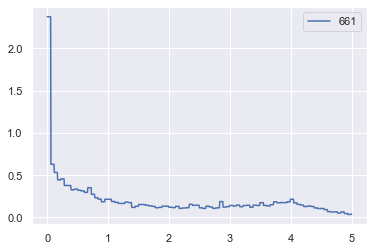

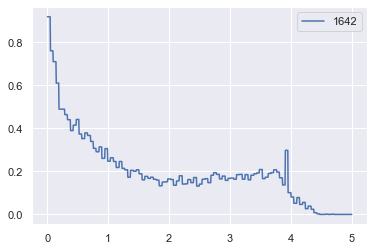

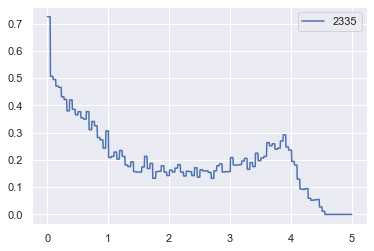

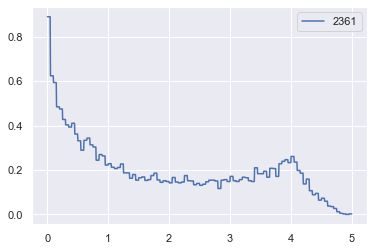

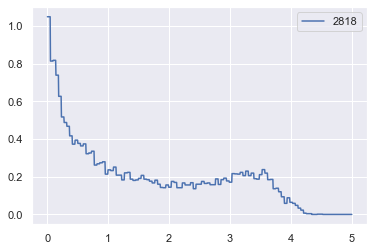

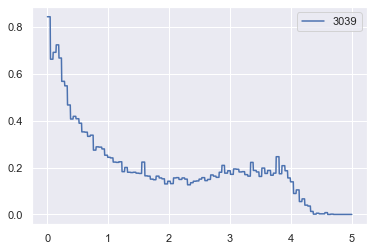

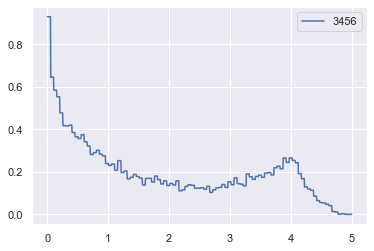

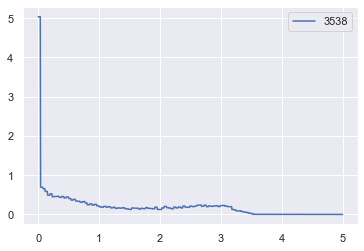

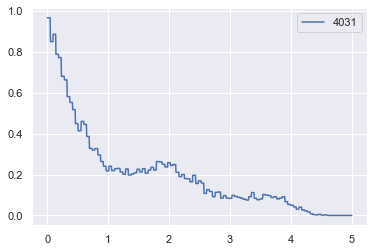

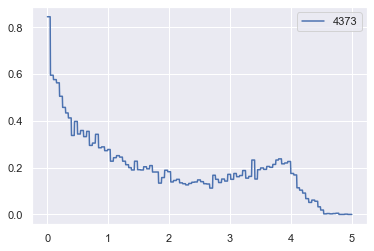

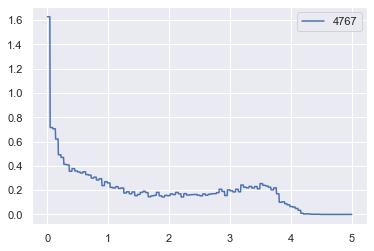

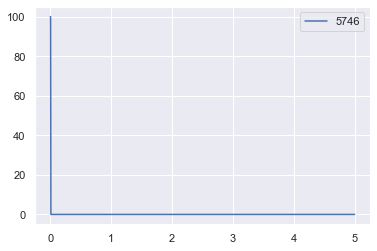

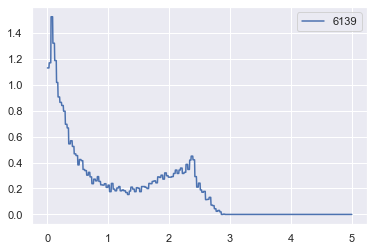

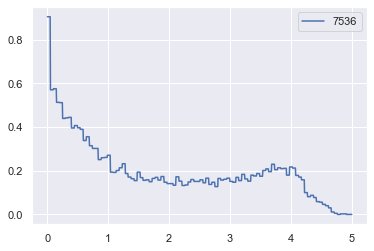

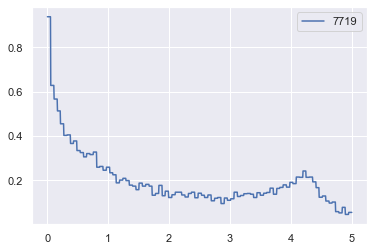

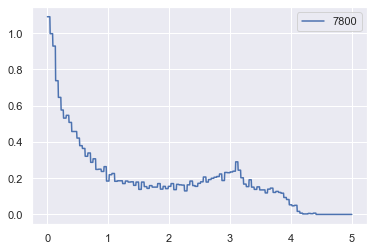

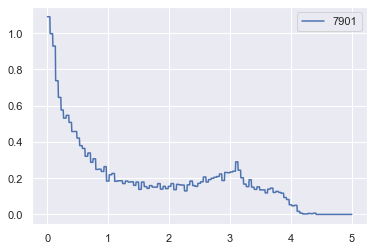

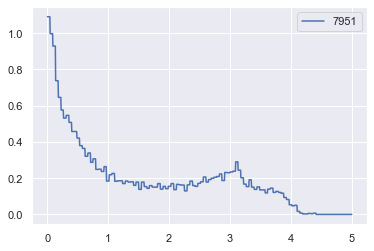

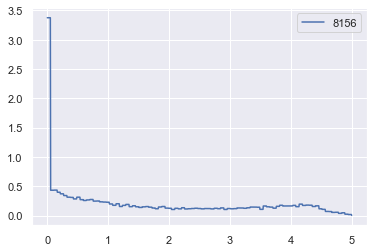

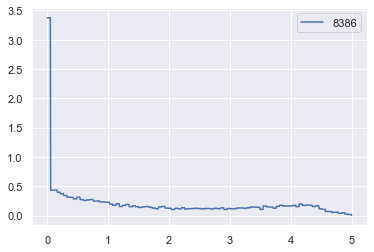

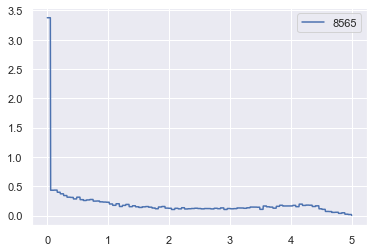

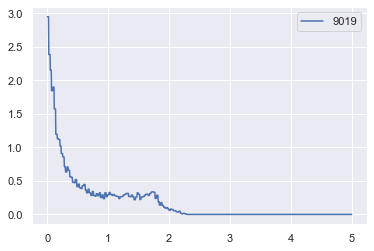

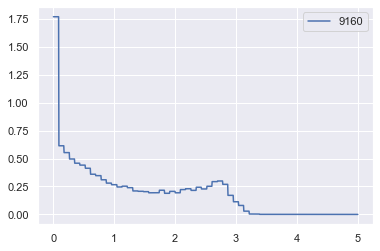

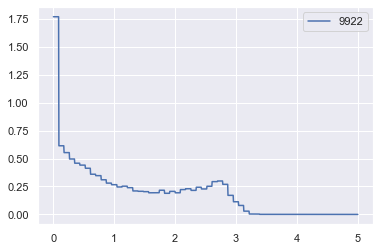

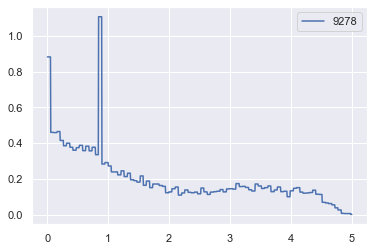

In [8]:
support = np.linspace(0,5, 1000)

for key in agent_keys:
    plt.plot(support, distributions_solar[key].pdf(support), label = key)
    plt.legend()
    plt.show()

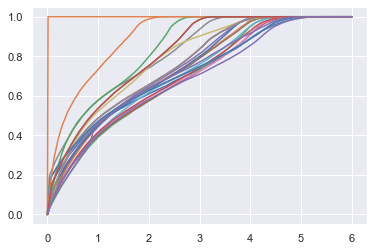

In [9]:
support = np.linspace(0,6, 1000)

for key in agent_keys:
    plt.plot(support, distributions_solar[key].cdf(support), label = key)
    #plt.plot(support, distributions_solar_2[key].cdf(support), label = key)
    #plt.legend()

plt.show()

In [10]:
sellers = [Seller(distributions[key]['probas_solar'], distributions[key]['values_solar'], wager = 100) for key in agent_keys[:-1] if key != 5746]
task = 1.7136738749507794

In [11]:
buyer = Buyer(distributions[agent_keys[-2]]['probas_solar'], distributions[agent_keys[-1]]['values_solar'], utility = 200)

In [12]:
market_1 = Market(sellers, buyer, task = task)

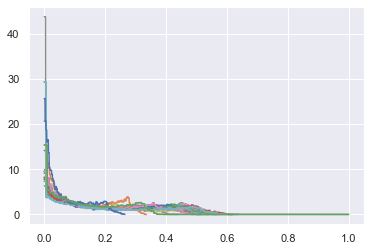

In [13]:
market_1.plot_scaled_forecasts()

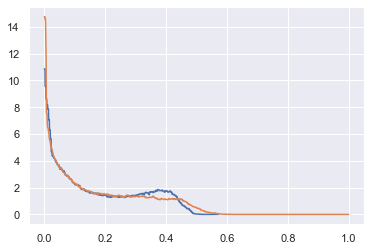

In [14]:
qa_forecast_scaled = market_1.scaled_aggregation(type = 'QA', plot = True)
lop_forecast_scaled = market_1.scaled_aggregation(type = 'LOP', plot = True)

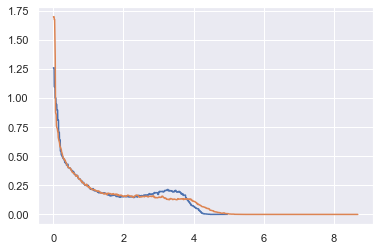

In [15]:
qa_forecast = market_1.aggregation(type = 'QA', plot = True)
lop_forecast = market_1.aggregation(type = 'LOP', plot = True)

In [16]:
market_1.make_scaling()

In [17]:
market_1.calculate_payoffs()

[ 99.72657717 100.63422376 100.64391092 100.37363669 100.56396568
 100.48677368 100.31498053  99.29762084 100.43548367 100.71544192
 100.54972518  99.61157035 100.47381541 100.11059677 100.31728854
 100.31728854 100.31728854  99.6498224   99.6498224   99.6498224
  95.88947043 100.13543707 100.13543707]
[9.04673304 9.13384859 9.13477836 9.10883755 9.12710524 9.11969639
 9.10320775 9.00556198 9.11477359 9.14164387 9.12573845 9.03569473
 9.11845266 9.08359108 9.10342927 9.10342927 9.10342927 9.03936614
 9.03936614 9.03936614 0.         9.08597524 9.08597524]


array([ 8.77331021,  9.76807234,  9.77868927,  9.48247424,  9.69107092,
        9.60647007,  9.41818828,  8.30318283,  9.55025727,  9.85708579,
        9.67546363,  8.64726508,  9.59226807,  9.19418785,  9.42071782,
        9.42071782,  9.42071782,  8.68918855,  8.68918855,  8.68918855,
       -4.11052957,  9.22141231,  9.22141231])

In [18]:
market_1.score_dict

{'Seller #0': 0.9425683845763021,
 'Seller #1': 0.951644850423664,
 'Seller #2': 0.9517417220503017,
 'Seller #3': 0.9490389797914743,
 'Seller #4': 0.950942269632934,
 'Seller #5': 0.9501703497027271,
 'Seller #6': 0.9484524181575386,
 'Seller #7': 0.9382788212937743,
 'Seller #8': 0.9496574495980462,
 'Seller #9': 0.9524570320485266,
 'Seller #10': 0.9507998647023873,
 'Seller #11': 0.9414183164058187,
 'Seller #12': 0.9500407670001835,
 'Seller #13': 0.9464085805445028,
 'Seller #14': 0.9484754982930905,
 'Seller #15': 0.9484754982930905,
 'Seller #16': 0.9484754982930905,
 'Seller #17': 0.9418008368937152,
 'Seller #18': 0.9418008368937152,
 'Seller #19': 0.9418008368937152,
 'Seller #20': 0.9041973171794175,
 'Seller #21': 0.9466569835261405,
 'Seller #22': 0.9466569835261405}

In [19]:
market_1.buyers_score

0.9178766401758701

## Peer-to-peer electricity market

In [20]:
def text_to_adj_matrix(matrix_path):
    res = []
    with open(matrix_path) as file:
        for s in file:
            string = ''.join(s.strip().strip(',').split(', '))
            lst_temp = [int(sym) for sym in string]

            res.append(lst_temp)

    return res

In [21]:
connection_matrix = text_to_adj_matrix('./matrices/matrix_2.txt')

In [22]:
Kappa = [[10 if i!=j else 0 for i in range(community_size)] for j in range(community_size)]

In [23]:
actual_generations = []
demand = []

for key in list(distributions_solar.keys()):
    if key != 5746:
        actual_generations.append(distributions_solar[key].mean())
    else:
        actual_generations.append(0)

    demand.append(np.random.choice([6,7,8,9]))

actual_generations = [1.7136738749507794,
                    1.5821348892434766,
                    1.8149917606972021,
                    1.830641395518309,
                    1.5138996137339054,
                    1.5895894345273751,
                    1.789797997994862,
                    1.1078542606914212,
                    1.261400104925318,
                    1.7052592657126997,
                    1.5571239475516365,
                    0,
                    1.00248918296893,
                    1.76106456673612,
                    1.8906722235842117,
                    1.447463478581979,
                    1.447463478581979,
                    1.447463478581979,
                    1.6546007742350222,
                    1.6546007742350222,
                    1.6546007742350222,
                    0.612626941514861,
                    1.1364467105263154,
                    1.1364467105263154,
                    1.6923678186412126]

#actual_generations = [100 for i in range(community_size)]

                    
demand = [8, 8, 9, 7, 8, 7, 7, 9, 9, 8, 8, 6, 9, 6, 8, 6, 7, 9, 7, 6, 8, 7, 7, 8, 6]
#demand = [3 for i  in range(community_size)]

In [24]:
price_da_buy = 3
price_da_sell = 2
price_rt_buy = 4
price_rt_sell = 1

In [25]:
means_base_forecasts = [mean + np.random.normal(0, 0.4) for mean in actual_generations]

means_base_forecasts = [0.8045670270776432,
                        1.013315729602517,
                        2.0284857954454707,
                        1.7236086139928533,
                        0.9281422425924236,
                        1.5556687075573468,
                        1.242477100535213,
                        1.4571803040470759,
                        1.6742950501106706,
                        1.5738517232502214,
                        1.699506159188794,
                        0.2405423035568037,
                        1.5258808003369477,
                        1.6408779364595203,
                        2.3044433411181995,
                        2.1905783675037593,
                        1.4433559888096898,
                        0.9463246169038547,
                        2.111857347190762,
                        1.599330231524489,
                        1.925669117842285,
                        1.7530069905258472,
                        1.8120144586989713,
                        0.7283821698186553,
                        1.6283037307914494]

In [26]:
myclip_a = 0
myclip_b = 10
my_scale = 5.0

def scale_parameters(myclip_a, myclip_b, my_mean, my_std):
    a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std

    return a,b

base_forecasts = [stats.truncnorm(loc = mean, 
                                scale = my_scale, 
                                a = scale_parameters(myclip_a, myclip_b, mean, my_scale)[0], 
                                b = scale_parameters(myclip_a, myclip_b, mean, my_scale)[1]) for mean in means_base_forecasts]

base_forecasts = [stats.uniform(loc = 0, 
                               scale = 7) for mean in means_base_forecasts]

agents_forecasts = []
for base_forecast in base_forecasts:
    probas, values = np.histogram(base_forecast.rvs(100000), bins = 100, density = True)
    probas = probas / probas.sum()
    agents_forecasts.append((probas, values))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


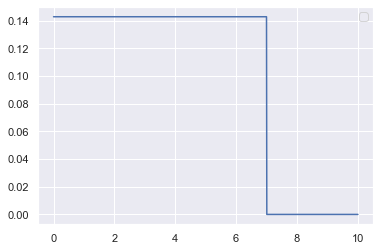

In [27]:
support = np.linspace(0,10, 1000)

plt.plot(support, base_forecasts[0].pdf(support))
plt.legend()
plt.show()

In [28]:
agents = []
for id in range(community_size):
    agent = Agents(id = id,
                probabilities = agents_forecasts[id][0],
                generation_values = agents_forecasts[id][1],
                demand = demand[id],
                connections = connection_matrix[id],
                kappa = Kappa[id])

    agents.append(agent)

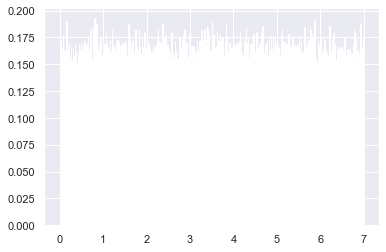

In [29]:
for i in range(5):
    plt.hist(base_forecasts[i].rvs(100000), bins = 1000, density = True);

In [30]:
model_1 = gp.Model()

market_1 = FirstStageMarket(agents= agents,
                            model = model_1,
                            price_da_buy = price_da_buy,
                            price_da_sell = price_da_sell,
                            price_rt_buy = price_rt_buy,
                            price_rt_sell = price_rt_sell)

In [31]:
market_1.build_model()

In [32]:
model_1.optimize()

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[arm])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 2573 rows, 5123 columns and 12669 nonzeros
Model fingerprint: 0x5bcc22a1
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [9e-03, 3e+00]
  Bounds range     [1e+01, 1e+01]
  RHS range        [2e-02, 9e+00]
Presolve removed 63 rows and 39 columns
Presolve time: 0.01s
Presolved: 2510 rows, 5084 columns, 12543 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0      handle free variables                          0s
    3809    3.6245300e+02   0.000000e+00   0.000000e+00      0s

Solved in 3809 iterations and 0.09 seconds (0.11 work units)
Optimal objective  3.624530049e+02


In [33]:
def second_stage_resolution(model, agents, actual_generations):
    second_stage_decisions = []
    actual_costs = []
    for agent in agents:
        second_stage_decision = (agent.demand 
                                - actual_generations[agent.id] 
                                - model.getVarByName(f'Agent {agent.id} day-ahead purchase').X
                                + model.getVarByName(f'Agent {agent.id} day-ahead sale').X
                                - model.getVarByName(f'Agent {agent.id} net trading').X)

        second_stage_cost = price_rt_buy * second_stage_decision if second_stage_decision > 0 else price_rt_sell * second_stage_decision

        second_stage_decisions.append(second_stage_decision)

        actual_cost = (price_da_buy * model.getVarByName(f'Agent {agent.id} day-ahead purchase').X 
                    - price_da_sell * model.getVarByName(f'Agent {agent.id} day-ahead sale').X
                    + second_stage_cost)


        actual_costs.append(actual_cost)

    return second_stage_decisions, actual_costs

In [34]:
model_1.getVars()

[<gurobi.Var Agent 0 day-ahead purchase (value 8.46056470874715)>,
 <gurobi.Var Agent 0 day-ahead sale (value 0.0)>,
 <gurobi.Var Agent 0 proba 0 real-time purchase (value 4.619825661452218)>,
 <gurobi.Var Agent 0 proba 1 real-time purchase (value 4.549828302945368)>,
 <gurobi.Var Agent 0 proba 2 real-time purchase (value 4.479830944438515)>,
 <gurobi.Var Agent 0 proba 3 real-time purchase (value 4.409833585931665)>,
 <gurobi.Var Agent 0 proba 4 real-time purchase (value 4.3398362274248115)>,
 <gurobi.Var Agent 0 proba 5 real-time purchase (value 4.26983886891796)>,
 <gurobi.Var Agent 0 proba 6 real-time purchase (value 4.199841510411108)>,
 <gurobi.Var Agent 0 proba 7 real-time purchase (value 4.129844151904257)>,
 <gurobi.Var Agent 0 proba 8 real-time purchase (value 4.059846793397405)>,
 <gurobi.Var Agent 0 proba 9 real-time purchase (value 3.9898494348905515)>,
 <gurobi.Var Agent 0 proba 10 real-time purchase (value 3.9198520763837017)>,
 <gurobi.Var Agent 0 proba 11 real-time purc

In [35]:
second_stage_resolution(model_1, agents, actual_generations)[1]

[37.00735694633784,
 12.150982110458251,
 11.220339744804743,
 48.29743225178437,
 12.424327899852422,
 12.12164066215276,
 48.460810317484544,
 57.18856371094573,
 13.434525296830476,
 11.658409474803754,
 12.251627088381703,
 18.90020762631555,
 14.469786324435347,
 45.575753974228235,
 10.916714906668322,
 12.690391967810914,
 12.689457937452023,
 12.690113691954856,
 11.861609545565333,
 11.86156488153426,
 52.001596790762505,
 16.029512351942113,
 13.934171089507803,
 13.93365960310015,
 11.710096576972735]

In [36]:
agents[0].connections

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [37]:
print('Model_1 net trades:', [model_1.getVarByName(f'Agent {id} net trading').X for id, _ in enumerate(agents)])


Model_1 net trades: [-5.080654288722028, 3.38011958314196, 4.379923303101612, -10.0, 3.3800184113029896, 2.380000399934435, -10.0, -10.0, 4.379968570867063, 3.3801383655863617, 3.379969280352938, 1.2399276656484597, 4.380064235922234, -10.0, 3.3801490497487077, 1.3799385294652922, 2.380172037055015, 4.380008098429307, 2.3799968393736446, 1.3800080053814128, -10.0, 2.3799949704996104, 2.380010517096734, 3.380138388698647, 1.3801080371156038]


In [38]:
def trading_costs(agents, model):
    res = []
    duals = model.getAttr('Pi')
    const_names = model.getConstrs()

    for agent in agents:
        agent_trading_cost = 0
        for x in zip(const_names, duals):
            for agent_2 in agents:
                if str(x[0]) == f'<gurobi.Constr Bilateral trading for pair ({agent.id}, {agent_2.id})>':
                    print(f'q_{agent.id}_{agent_2.id}:', x[1], model.getVarByName(f'q_{agent.id}_{agent_2.id}').X)
                    agent_trading_cost += x[1] * model.getVarByName(f'q_{agent.id}_{agent_2.id}').X

        res.append(agent_trading_cost)

    return res

In [58]:
model_1.getConstrByName('')

[<gurobi.Constr Net trading constraint>,
 <gurobi.Constr SD balance for agent 0 proba 0>,
 <gurobi.Constr SD balance for agent 0 proba 1>,
 <gurobi.Constr SD balance for agent 0 proba 2>,
 <gurobi.Constr SD balance for agent 0 proba 3>,
 <gurobi.Constr SD balance for agent 0 proba 4>,
 <gurobi.Constr SD balance for agent 0 proba 5>,
 <gurobi.Constr SD balance for agent 0 proba 6>,
 <gurobi.Constr SD balance for agent 0 proba 7>,
 <gurobi.Constr SD balance for agent 0 proba 8>,
 <gurobi.Constr SD balance for agent 0 proba 9>,
 <gurobi.Constr SD balance for agent 0 proba 10>,
 <gurobi.Constr SD balance for agent 0 proba 11>,
 <gurobi.Constr SD balance for agent 0 proba 12>,
 <gurobi.Constr SD balance for agent 0 proba 13>,
 <gurobi.Constr SD balance for agent 0 proba 14>,
 <gurobi.Constr SD balance for agent 0 proba 15>,
 <gurobi.Constr SD balance for agent 0 proba 16>,
 <gurobi.Constr SD balance for agent 0 proba 17>,
 <gurobi.Constr SD balance for agent 0 proba 18>,
 <gurobi.Constr SD 

In [57]:
model_1.getAttr('Pi')

[-0.1000000000000005,
 -0.038759999999999996,
 -0.043199999999999995,
 -0.03924,
 -0.03764,
 -0.04283999999999999,
 -0.03956,
 -0.039880000000000006,
 -0.03924,
 -0.03991999999999997,
 -0.04028000000000003,
 -0.04128000000000003,
 -0.041079999999999964,
 -0.04043999999999997,
 -0.03932000000000002,
 -0.0420000000000001,
 -0.04179999999999983,
 -0.03984000000000009,
 -0.038679999999999846,
 -0.037240000000000086,
 -0.03980000000000009,
 -0.04019999999999983,
 -0.041120000000000094,
 -0.039720000000000096,
 -0.038879999999999845,
 -0.038080000000000086,
 -0.040639999999999836,
 -0.0399600000000001,
 -0.040120000000000086,
 -0.03883999999999984,
 -0.040760000000000095,
 -0.04095999999999984,
 -0.039360000000000096,
 -0.03872000000000009,
 -0.03931999999999985,
 -0.03948000000000009,
 -0.04019999999999983,
 -0.041280000000000094,
 -0.0399600000000001,
 -0.038879999999999845,
 -0.0418800000000001,
 -0.03880000000000009,
 -0.03687999999999985,
 -0.04132000000000009,
 -0.039720000000000096,
 

In [39]:
trading_costs(agents, model_1)

q_0_1: 0.0 -5.080654288722028
q_1_0: -0.1000000000000005 5.080654288722027
q_1_2: -0.1000000000000005 -1.7005347055800684
q_2_1: 0.0 1.7005347055800684
q_2_20: -0.1000000000000005 10.0
q_2_24: -0.1000000000000005 -7.320611402478455
q_3_24: 0.0 -10.0
q_4_15: -0.1000000000000005 5.760013381802601
q_4_21: -0.1000000000000005 -2.3799949704996104
q_5_22: -0.1000000000000005 2.380000399934435
q_6_22: -0.09999999999999942 -10.0
q_7_14: 0.0 -10.0
q_8_14: 0.0 4.379968570867064
q_9_16: -0.1000000000000005 3.3801383655863617
q_10_16: 0.0 3.379969280352938
q_11_17: -0.1 1.2399276656484588
q_12_17: -0.1 4.380064235922234
q_13_19: -0.09999999999999934 -10.0
q_14_7: -0.10000000000000017 10.0
q_14_8: -0.1000000000000005 -4.379968570867063
q_14_15: 0.0 -2.2398823793842295
q_15_4: 0.0 -5.7600133818026
q_15_14: -0.1000000000000005 2.2398823793842304
q_15_22: -0.1000000000000005 1.8598506942701842
q_15_24: 0.0 3.0402188376134784
q_16_9: 0.0 -3.3801383655863617
q_16_10: -0.1000000000000005 -3.3799692803529

[0.0,
 -0.3380119583141976,
 -0.2679388597521558,
 0.0,
 -0.33800184113030074,
 -0.23800003999344468,
 0.9999999999999942,
 0.0,
 0.0,
 -0.33801383655863787,
 0.0,
 -0.12399276656484588,
 -0.4380064235922234,
 0.9999999999999933,
 -0.5620031429132932,
 -0.4099733073654436,
 0.3379969280352955,
 -1.0,
 0.0,
 0.23799968393736567,
 0.0,
 0.0,
 0.0,
 -0.3380138388698664,
 0.5940503365362944]

In [40]:
def corrected_trading_costs(agents, model, price_da_buy):
    res = []
    for agent in agents:
        agent_trading_cost = 0
        for agent_2 in agents:
            if agent.connections[agent_2.id]:
                agent_trading_cost += price_da_buy * model.getVarByName(f'q_{agent.id}_{agent_2.id}').X

        res.append(agent_trading_cost)

    return res

In [41]:
corrected_trading_costs(agents, model_1, price_da_buy)

[-15.241962866166084,
 10.140358749425875,
 13.139769909304839,
 -30.0,
 10.14005523390897,
 7.140001199803304,
 -30.0,
 -30.0,
 13.139905712601191,
 10.140415096759085,
 10.139907841058815,
 3.7197829969453764,
 13.140192707766701,
 -30.0,
 10.140447149246125,
 4.13981558839588,
 7.140516111165045,
 13.140024295287922,
 7.139990518120934,
 4.140024016144238,
 -30.0,
 7.1399849114988285,
 7.1400315512902,
 10.140415166095941,
 4.140324111346816]

In [42]:
def overall_costs(agents, model, price_da_buy, actual_generations):
    return np.array(second_stage_resolution(model, agents, actual_generations)[1]) + np.array(corrected_trading_costs(agents, model, price_da_buy))

In [43]:
overall_costs(agents, model_1, price_da_buy, actual_generations)

array([21.76539408, 22.29134086, 24.36010965, 18.29743225, 22.56438313,
       19.26164186, 18.46081032, 27.18856371, 26.57443101, 21.79882457,
       22.39153493, 22.61999062, 27.60997903, 15.57575397, 21.05716206,
       16.83020756, 19.82997405, 25.83013799, 19.00160006, 16.0015889 ,
       22.00159679, 23.16949726, 21.07420264, 24.07407477, 15.85042069])

In [44]:
buys_forecast = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#buys_forecast = [1 for i in range(community_size)]

In [45]:
for id in range(community_size):
    if buys_forecast[id]:
        probas, values = np.histogram(qa_forecast_scaled.rvs(100000), bins = 100, density = True)
        probas = probas / probas.sum()
        agents[id].probabilities = probas
        agents[id].generation_values = values

In [46]:
model_2 = gp.Model()

market_2 = FirstStageMarket(agents= agents,
                            model = model_2,
                            price_da_buy = price_da_buy,
                            price_da_sell = price_da_sell,
                            price_rt_buy = price_rt_buy,
                            price_rt_sell = price_rt_sell)

In [47]:
market_2.build_model()

In [48]:
model_2.optimize()

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[arm])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 2474 rows, 4925 columns and 12174 nonzeros
Model fingerprint: 0x03f030bb
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [9e-03, 4e+00]
  Bounds range     [1e+01, 1e+01]
  RHS range        [2e-02, 9e+00]
Presolve removed 63 rows and 41 columns
Presolve time: 0.02s
Presolved: 2411 rows, 4884 columns, 12046 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0      handle free variables                          0s
    3417    3.6001821e+02   0.000000e+00   0.000000e+00      0s

Solved in 3417 iterations and 0.08 seconds (0.10 work units)
Optimal objective  3.600182147e+02


In [49]:
overall_costs(agents, model_2, price_da_buy, actual_generations)

array([20.64543634, 22.29134086, 24.36010965, 18.29743225, 22.56438313,
       19.26164186, 18.46081032, 27.18856371, 26.57443101, 21.79882457,
       22.39153493, 22.61999062, 27.60997903, 15.57575397, 21.05716206,
       16.83020756, 19.82997405, 25.83013799, 19.00160006, 16.0015889 ,
       22.00159679, 23.16949726, 21.07420264, 24.07407477, 15.85042069])

In [50]:
diff = overall_costs(agents, model_2, price_da_buy, actual_generations) - overall_costs(agents, model_1, price_da_buy, actual_generations)

In [51]:
diff

array([-1.11995774e+00,  3.55271368e-15,  0.00000000e+00, -7.10542736e-15,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -3.55271368e-15,
       -5.32907052e-15])

In [52]:
diff.sum()

-1.1199577361096384

In [53]:
corrected_trading_costs(agents, model_2, price_da_buy)

[-12.241649247817834,
 10.14035874942588,
 13.139769909304839,
 7.140006498427191,
 10.14005523390897,
 7.140001199803304,
 7.13999307160803,
 -30.0,
 13.139905712601191,
 10.140415096759085,
 -30.0,
 3.7197829969453764,
 13.140192707766701,
 -30.0,
 10.140447149246125,
 4.13981558839588,
 7.140516111165045,
 13.140024295287922,
 -30.0,
 4.140024016144238,
 10.140000336892218,
 7.1399849114988285,
 7.1400315512902,
 -30.0,
 4.1403241113468106]

In [54]:
corrected_trading_costs(agents, model_1, price_da_buy)

[-15.241962866166084,
 10.140358749425875,
 13.139769909304839,
 -30.0,
 10.14005523390897,
 7.140001199803304,
 -30.0,
 -30.0,
 13.139905712601191,
 10.140415096759085,
 10.139907841058815,
 3.7197829969453764,
 13.140192707766701,
 -30.0,
 10.140447149246125,
 4.13981558839588,
 7.140516111165045,
 13.140024295287922,
 7.139990518120934,
 4.140024016144238,
 -30.0,
 7.1399849114988285,
 7.1400315512902,
 10.140415166095941,
 4.140324111346816]

In [55]:
np.array(corrected_trading_costs(agents, model_2, price_da_buy)) - np.array(corrected_trading_costs(agents, model_1, price_da_buy))

array([ 3.00031362e+00,  5.32907052e-15,  0.00000000e+00,  3.71400065e+01,
        0.00000000e+00,  0.00000000e+00,  3.71399931e+01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -4.01399078e+01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -3.71399905e+01,  0.00000000e+00,
        4.01400003e+01,  0.00000000e+00,  0.00000000e+00, -4.01404152e+01,
       -5.32907052e-15])

In [56]:
sum(np.array(corrected_trading_costs(agents, model_2, price_da_buy)) - np.array(corrected_trading_costs(agents, model_1, price_da_buy)))

-5.329070518200751e-15